# Implementing K-Nearest Neighbors
- Supervised Machine Learning Algorithm

In [1]:
# Import Relevant Modules
import math
from time import time
import numpy as np

# Import Spreadsheet Manipulation library  
from openpyxl import load_workbook

# Import Plotting Modules
from matplotlib import pyplot as plt

# Import Random Number Generator
import random
from random import shuffle

# Import Machine Learning Libraries
from sklearn import neighbors, datasets
from sklearn.neighbors import KNeighborsClassifier  
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline 

# Import GridSearch packages
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# Opening the Excel File with Credit Card Data
Considering only attributes:
- Years Employed
- Prior Default
- Employed
- Credit Score

In [2]:
filepath="credit_card_data.xlsx" #Enter full filepath here
wb=load_workbook(filepath)
sheet=wb.active

#set-wise data read-in 
def read(num):
    x, y = [], []
    
# 1. Male, 2. Age, 3. Debt, 4. Married, 5. Bank Customer, 6. Education Level, 7. Ethnicity, 8. Years Employed, 
# 9.Prior Default, 10. Employed, 11. Credit Score, 12. Driver's License, 13. Citizen, 14. Zip Code, 15. Income

    cols = [8, 9, 10, 11] 
    for i in cols:
        x.append(sheet.cell(row=num+1,column=i).value)
    y.append(sheet.cell(row=num+1,column=16).value)
    return x, y

x_data, y_data = [], []
for j in range(1, 654):
    valx, valy = read(j)
    x_data.append(valx)    
    y_data.append(valy)

#print(x_data, y_data)

# Generate Random Number for Shuffling

In [3]:
random.seed(455534) # random number generator, a specific random number will be used in every iteration of the code
toshuffle = list(zip(x_data, y_data)) #zip x and y (keeps x and y together)
shuffle(toshuffle) # shuffle
x_data, y_data = zip(*toshuffle) # open the shuffled data sets

# K Nearest Neighbors Algorithm
- With the number of neighbors, k in the range of 0 ~ 100

In [4]:
# Train Test Split
# ~ 15% test ; ~ 85% train
cut = 550
train_x, train_y = x_data[0:cut], y_data[0:cut] # train = 550 datasets
test_x, test_y = x_data[cut:650], y_data[cut:650] # test = 100 datasets

k=[] 
acc=[]

for i in range(1,100):
    # Implementing KNN 
    kmodel = KNeighborsClassifier(n_neighbors=i, weights='uniform', algorithm='auto', leaf_size=1, p=1 ,metric='minkowski', metric_params=None, n_jobs=None)
    print('n_neighbors: ', i) 
    x = k.append(i)
    kmodel.fit(train_x, train_y)

    predicted = kmodel.predict_proba(test_x)
    c = 0
    for each in range(len(predicted)):
        if np.argmax(predicted[each]) == test_y[each]:    
            c += 1

    print("Percentage Accuracy: -----> ", (float(c/len(predicted))*100))
    print("")
    y = acc.append(float(c/len(predicted))*100)



n_neighbors:  1
Percentage Accuracy: ----->  82.0

n_neighbors:  2
Percentage Accuracy: ----->  80.0

n_neighbors:  3
Percentage Accuracy: ----->  87.0

n_neighbors:  4
Percentage Accuracy: ----->  85.0

n_neighbors:  5
Percentage Accuracy: ----->  88.0

n_neighbors:  6
Percentage Accuracy: ----->  88.0

n_neighbors:  7
Percentage Accuracy: ----->  88.0

n_neighbors:  8
Percentage Accuracy: ----->  86.0

n_neighbors:  9
Percentage Accuracy: ----->  88.0

n_neighbors:  10
Percentage Accuracy: ----->  87.0

n_neighbors:  11
Percentage Accuracy: ----->  86.0

n_neighbors:  12
Percentage Accuracy: ----->  86.0

n_neighbors:  13
Percentage Accuracy: ----->  85.0

n_neighbors:  14
Percentage Accuracy: ----->  86.0

n_neighbors:  15
Percentage Accuracy: ----->  86.0

n_neighbors:  16
Percentage Accuracy: ----->  86.0

n_neighbors:  17
Percentage Accuracy: ----->  86.0

n_neighbors:  18
Percentage Accuracy: ----->  88.0

n_neighbors:  19
Percentage Accuracy: ----->  86.0

n_neighbors:  20
Perc

C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

Percentage Accuracy: ----->  84.0

n_neighbors:  36
Percentage Accuracy: ----->  85.0

n_neighbors:  37
Percentage Accuracy: ----->  84.0

n_neighbors:  38
Percentage Accuracy: ----->  84.0

n_neighbors:  39
Percentage Accuracy: ----->  84.0

n_neighbors:  40
Percentage Accuracy: ----->  84.0

n_neighbors:  41
Percentage Accuracy: ----->  84.0

n_neighbors:  42
Percentage Accuracy: ----->  86.0

n_neighbors:  43
Percentage Accuracy: ----->  85.0

n_neighbors:  44
Percentage Accuracy: ----->  86.0

n_neighbors:  45
Percentage Accuracy: ----->  86.0

n_neighbors:  46
Percentage Accuracy: ----->  85.0

n_neighbors:  47
Percentage Accuracy: ----->  87.0

n_neighbors:  48
Percentage Accuracy: ----->  86.0

n_neighbors:  49
Percentage Accuracy: ----->  86.0

n_neighbors:  50
Percentage Accuracy: ----->  87.0

n_neighbors:  51
Percentage Accuracy: ----->  86.0

n_neighbors:  52
Percentage Accuracy: ----->  86.0

n_neighbors:  53
Percentage Accuracy: ----->  85.0

n_neighbors:  54
Percentage A

C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

 86.0

n_neighbors:  64
Percentage Accuracy: ----->  83.0

n_neighbors:  65
Percentage Accuracy: ----->  84.0

n_neighbors:  66
Percentage Accuracy: ----->  84.0

n_neighbors:  67
Percentage Accuracy: ----->  85.0

n_neighbors:  68
Percentage Accuracy: ----->  85.0

n_neighbors:  69
Percentage Accuracy: ----->  85.0

n_neighbors:  70
Percentage Accuracy: ----->  85.0

n_neighbors:  71
Percentage Accuracy: ----->  85.0

n_neighbors:  72
Percentage Accuracy: ----->  85.0

n_neighbors:  73
Percentage Accuracy: ----->  85.0

n_neighbors:  74
Percentage Accuracy: ----->  86.0

n_neighbors:  75
Percentage Accuracy: ----->  86.0

n_neighbors:  76
Percentage Accuracy: ----->  87.0

n_neighbors:  77
Percentage Accuracy: ----->  86.0

n_neighbors:  78
Percentage Accuracy: ----->  88.0

n_neighbors:  79
Percentage Accuracy: ----->  88.0

n_neighbors:  80
Percentage Accuracy: ----->  88.0

n_neighbors:  81
Percentage Accuracy: ----->  88.0

n_neighbors:  82
Percentage Accuracy: ----->  88.0

n_nei

C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  from ipykernel import kernelapp as app
C:\Users\hewyu\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for 

# Plot of the Elbow Method 
- To identify the value of k that yields the highest precentage accuracy first 

(75, 90)

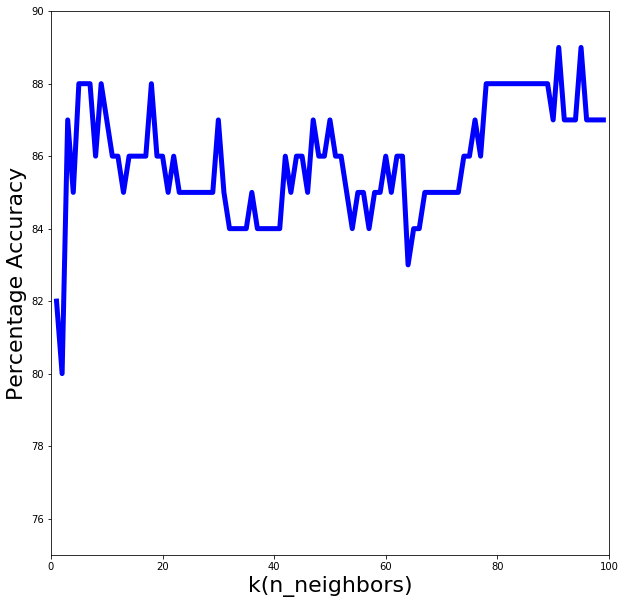

In [9]:
# Code for the plot
fig = plt.figure(figsize=(10,10))
#ax = plt.subplot(111)
plt.plot(k, acc, color='blue', linewidth=5)

# Add axis labels
plt.xlabel('k(n_neighbors)', fontsize=22)
plt.ylabel('Percentage Accuracy', fontsize=22)

#set axis limits
plt.xlim(0,100)
plt.ylim(75,90)

# Gridsearch Algorithm 

In [7]:
X, y = x_data, y_data
X, y = np.asarray(X), np.asarray(y)

# build a classifier
clf = KNeighborsClassifier(n_neighbors=4, weights='uniform', algorithm='auto', leaf_size=1, p=1, metric='minkowski', metric_params=None, n_jobs=None)

# Utility function to report best scores
def report(results, n_top=20):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})"
                  .format(results['mean_test_score'][candidate],
                          results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

# specify parameters and distributions to sample from
params = {'n_neighbors': list(range(1,100)), 'p': list(range(1,5))}

# 'p' is consistently equal to 1
# 'algorithm' does not affect the accuracy ; each algorithm is rank 1
# 'leaf size' does not affect the accuracy ; it only passed through certain algorithms ; all leaf size is rank 1
# 'metric' : minkowski & manhattan > chebyshev & euclidean (dont really know how to implement wminkowski, seuclidean, and mahalanobis)
# 'n_jobs': does not affect the accuracy ; each n_jobs is rank 1

# run grid search
grid_search = GridSearchCV(clf, param_grid=params)
start = time()
grid_search.fit(X, y.ravel())

print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(grid_search.cv_results_['params'])))
report(grid_search.cv_results_)

C:\Users\hewyu\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


GridSearchCV took 15.86 seconds for 396 candidate parameter settings.
Model with rank: 1
Mean validation score: 0.842 (std: 0.017)
Parameters: {'n_neighbors': 9, 'p': 1}

Model with rank: 1
Mean validation score: 0.842 (std: 0.013)
Parameters: {'n_neighbors': 11, 'p': 1}

Model with rank: 3
Mean validation score: 0.841 (std: 0.017)
Parameters: {'n_neighbors': 13, 'p': 1}

Model with rank: 4
Mean validation score: 0.839 (std: 0.017)
Parameters: {'n_neighbors': 15, 'p': 1}

Model with rank: 4
Mean validation score: 0.839 (std: 0.016)
Parameters: {'n_neighbors': 20, 'p': 1}

Model with rank: 4
Mean validation score: 0.839 (std: 0.018)
Parameters: {'n_neighbors': 21, 'p': 1}

Model with rank: 7
Mean validation score: 0.838 (std: 0.017)
Parameters: {'n_neighbors': 7, 'p': 1}

Model with rank: 7
Mean validation score: 0.838 (std: 0.017)
Parameters: {'n_neighbors': 19, 'p': 1}

Model with rank: 7
Mean validation score: 0.838 (std: 0.015)
Parameters: {'n_neighbors': 23, 'p': 1}

Model with ran